Dado o problema de previsão dos valores de venda de um imóvel baseado em seu tamanho teremos:

$x=area$

$y=price$

Logo teremos a tupla $(x,y)$, que serão os dados utilizados para ajustar nossa regressão linear.

Os dados a serem utilizados fazem parte de um dataset disponibilizado na plataforma Kaggle, disponível no link abaixo:

https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression

Importando os dados para uso das informações.

In [29]:

import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sklearn

In [30]:
housing=pd.DataFrame(pd.read_csv("Housing.csv"))

In [31]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Separando os dados em train e test

In [32]:
#Seperando os dados em housing_train e housing_test

from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing, test_size=0.5, random_state=0)

In [33]:
X_train=housing_train[['area']]
X_test=housing_test[['area']]

In [34]:
y_train=housing_train[['price']]
y_test=housing_test[['price']]

In [35]:
X_train.head


<bound method NDFrame.head of       area
2     9960
221   3420
513   4400
146  10500
241   3760
..     ...
70    4000
277  10360
9     5750
359   3600
192   6600

[272 rows x 1 columns]>

In [36]:
y_train.head

<bound method NDFrame.head of         price
2    12250000
221   4767000
513   2485000
146   5600000
241   4550000
..        ...
70    6790000
277   4305000
9     9800000
359   3710000
192   5040000

[272 rows x 1 columns]>

Agora que ja separamos os parâmetros a serem utilizados, area e preço.
Poderemos construir a regressão.

In [37]:
X_train.shape

(272, 1)

In [38]:
y_train.shape

(272, 1)

In [39]:
random.seed(32)
from numpy import linalg as linalg

Aplicando o Feature Scaling nos dados

Definindo o método da Regressão Linear

In [40]:
class linear_regression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.min_X = None
        self.max_X = None
        self.bias = None
        self.min_y = None
        self.max_y = None
        
        
        
    def fit(self, X, y):
        X=np.column_stack((np.ones(len(X)), X))
        
        XtX=np.dot(X.T, X)
        XtX_inv=linalg.inv(XtX)
        XtY=np.dot(X.T, y)
        B=np.dot(XtX_inv, XtY)
        self.weights = B

        
    def predict(self, X):
        X=np.column_stack((np.ones(len(X)), X))
        y_predicted= np.dot(X, self.weights)
        return y_predicted   
    
    def cost_function(self, X, y):
        #Seguindo a formula do MSE (Mean Squared Error)
        return np.mean((y_predicted - y) ** 2)
    
    def feature_scaling_X_train(self, X):
        self.min_X = np.min(X, axis=0)
        self.max_X = np.max(X, axis=0)
        return (X - self.min_X) / (self.max_X - self.min_X)
    
    def feature_scaling_y_train(self, y):
        self.min_y = np.min(y, axis=0)
        self.max_y = np.max(y, axis=0)
        return (y - self.min_y) / (self.max_y - self.min_y)
    
    def inverse_feature_scaling_y(self, y):
        return y * (self.max_y - self.min_y) + self.min_y
    
    def inverse_feature_scaling_X(self, X):
        return X * (self.max_X - self.min_X) + self.min_X
    
    def feature_scaling_X_test(self, X):

        return (X - self.min_X) / (self.max_X - self.min_X)
    

    def feature_scaling_y_test(self, y):
        return (y - self.min_y) / (self.max_y - self.min_y)
    
#Calculando a acurácia do modelo
    
    def score(self, y_pred, y_real):      
    
    def plot_regression_line(self, X, y):
        plt.scatter(X, y)
        y_pred = self.predict(X)
        plt.plot(X, y_pred, color='red')
        plt.show()
                

In [41]:
#Instanciando o modelo

model = linear_regression(learning_rate=1, iterations=1000)

In [42]:
#Normalizando os dados de treino
X_train = model.feature_scaling_X_train(X_train)
y_train = model.feature_scaling_y_train(y_train)
print(X_train)

         area
2    0.586813
221  0.107692
513  0.179487
146  0.626374
241  0.132601
..        ...
70   0.150183
277  0.616117
9    0.278388
359  0.120879
192  0.340659

[272 rows x 1 columns]


In [43]:
#Treinando o modelo
model.fit(X_train, y_train)
print(model.weights, model.bias)

[[0.12716232]
 [0.57520354]] None


In [44]:
#Normalizando os dados de teste
X_test = model.feature_scaling_X_test(X_test)
y_test = model.feature_scaling_y_test(y_test)
print(X_test)
    

         area
239  0.150183
113  0.561905
325  0.110623
66   0.824176
479  0.125275
..        ...
494  0.355311
322  0.110623
253  0.115018
299  0.369963
463  0.083516

[273 rows x 1 columns]


In [49]:
#Testando o modelo
y_predicted = model.predict(X_test)
print(y_predicted)


[[0.2135482 ]
 [0.45037193]
 [0.1907929 ]
 [0.60123118]
 [0.19922079]
 [0.31257592]
 [0.20722729]
 [0.19163569]
 [0.19298415]
 [0.42424547]
 [0.29782711]
 [0.21186262]
 [0.1903715 ]
 [0.30035548]
 [0.29719502]
 [0.14738926]
 [0.25147371]
 [0.2986699 ]
 [0.17562269]
 [0.23461793]
 [0.38842694]
 [0.31678986]
 [0.25568766]
 [0.11662746]
 [0.31552568]
 [0.17772967]
 [0.33996656]
 [0.28434249]
 [0.18405059]
 [0.31552568]
 [0.23040398]
 [0.14085765]
 [0.3989618 ]
 [0.21523378]
 [0.17646548]
 [0.31636847]
 [0.29782711]
 [0.17292577]
 [0.1903715 ]
 [0.1366437 ]
 [0.40317575]
 [0.29361317]
 [0.28939922]
 [0.27654669]
 [0.19332127]
 [0.29782711]
 [0.22029052]
 [0.21523378]
 [0.21548662]
 [0.28518527]
 [0.24894534]
 [0.45235249]
 [0.11452049]
 [0.20722729]
 [0.29277038]
 [0.28602806]
 [0.39264088]
 [0.24051745]
 [0.19669242]
 [0.33996656]
 [0.58858934]
 [0.32311078]
 [0.13495812]
 [0.29782711]
 [0.15623855]
 [0.16369723]
 [0.34649818]
 [0.23082538]
 [0.23461793]
 [0.31046895]
 [0.13537952]
 [0.27

In [54]:
#Calculando a acurácia do modelo
print(model.cost_function(X_train, y_train))

ValueError: shapes (272,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

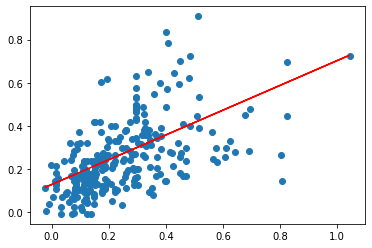

In [47]:
#Plotando a reta de regressão
model.plot_regression_line(X_test, y_test)

Equacao normal
gradiente estocastico

logistic regression
cross-entropy
dataset breast cancer UCI 1-feature
malignant - non-malignant